In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

In [2]:
data=np.loadtxt(r"C:\Users\user\Desktop\DataScience\UCSenDiego_ML\2_GenerativeModellingApproach\winery-univariate\winery-univariate\wine.data.txt",delimiter=',')

In [3]:
# data[:,0]

In [4]:
featurenames = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                'OD280/OD315 of diluted wines', 'Proline']

In [5]:
np.random.seed(0)
perm=np.random.permutation(178)
print(max(perm))

177


In [6]:
trainx=data[perm[0:130],1:14]
trainy=data[perm[0:130],0]
testx=data[perm[130:178],1:14]
testy=data[perm[130:178],0]

In [7]:
trainy

array([1., 3., 2., 1., 2., 2., 1., 3., 2., 2., 3., 3., 1., 2., 3., 2., 1.,
       1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2., 3., 1., 1., 2., 1.,
       1., 1., 3., 2., 2., 3., 1., 1., 2., 2., 2., 1., 3., 2., 3., 1., 3.,
       3., 1., 3., 1., 2., 3., 3., 2., 3., 3., 1., 2., 3., 2., 2., 3., 2.,
       1., 2., 2., 2., 1., 1., 2., 2., 3., 3., 2., 2., 2., 3., 3., 1., 3.,
       2., 2., 2., 2., 2., 1., 1., 2., 1., 3., 1., 3., 1., 1., 2., 1., 2.,
       2., 1., 3., 2., 1., 2., 2., 2., 3., 1., 3., 3., 1., 1., 2., 3., 1.,
       1., 2., 2., 1., 1., 1., 3., 2., 1., 2., 3.])

In [8]:
def density_plot(label, feature):
    mu=np.mean(trainx[trainy==label, feature])
    variance=np.var(trainx[trainy==label, feature])
    stdv=np.sqrt(variance)
    plt.hist(trainx[trainy==label, feature], density=True)
    x_axis = np.linspace(mu- 3*stdv,mu+ 3*stdv, 1000)
    plt.plot(x_axis, norm.pdf(x_axis, mu, stdv), 'r', lw=2)
    plt.title('Winery '+str(label))
    plt.xlabel(featurenames[feature])
    plt.ylabel('Density')



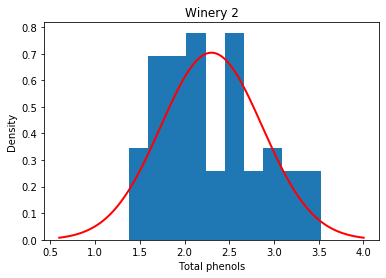

In [9]:
density_plot(2,5)

In [10]:
#feature with minimum std for label 1

a=[]
for i in range(0,13):
    b=np.std(trainx[trainy==1,i])
    a.append(b)

print(featurenames[np.argmin(a)],'=', np.min(a))

Nonflavanoid phenols = 0.05964288894974403


In [11]:
pi=[]
for label in range(1,4):
#     print(len(trainx[trainy==label,:]))
    a=len(trainx[trainy==label,:])/len(trainx)
    pi.append(a)
    print(pi)
print(sum(pi))

[0.33076923076923076]
[0.33076923076923076, 0.4153846153846154]
[0.33076923076923076, 0.4153846153846154, 0.25384615384615383]
1.0


In [12]:
def fit_generative_model(trainx,trainy,feature):
    mu=np.zeros(4)
    var=np.zeros(4)
    pi=np.zeros(4)
    for label in range(1,4):
        indices=(trainy==label)
        mu[label]=np.mean(trainx[indices,feature])
        var[label]=np.var(trainx[indices,feature])
        pi[label]=float(sum(indices))/float(len(trainy))
    return mu,var,pi

In [13]:
mu,var,pi=fit_generative_model(trainx,trainy,0)
print(mu,var,pi)

[ 0.         13.78534884 12.31092593 13.15969697] [0.         0.23325279 0.2819047  0.2851787 ] [0.         0.33076923 0.41538462 0.25384615]


In [14]:
def predictor_funtion(feature):
    mu,var,pi=fit_generative_model(trainx,trainy,feature)
    records=len(testy)
    score=np.zeros((records,4))
    for i in range(len(testy)):
        for label in range(1,4):
            score[i,label]=np.log(pi[label]) + norm.logpdf(testx[i,feature],mu[label], np.sqrt(var[label]))
    prediction=np.argmax(score[:,1:4], axis=1)+1
    return prediction

In [15]:
a=predictor_funtion(0)
len(a)
print(a)

[1 2 2 2 1 3 2 1 2 2 1 1 2 1 3 2 2 1 1 1 2 1 2 2 2 2 3 1 1 2 3 2 2 1 1 1 3
 2 2 2 3 3 1 2 2 2 1 1]


In [16]:
trainx[0:2]

array([[1.374e+01, 1.670e+00, 2.250e+00, 1.640e+01, 1.180e+02, 2.600e+00,
        2.900e+00, 2.100e-01, 1.620e+00, 5.850e+00, 9.200e-01, 3.200e+00,
        1.060e+03],
       [1.279e+01, 2.670e+00, 2.480e+00, 2.200e+01, 1.120e+02, 1.480e+00,
        1.360e+00, 2.400e-01, 1.260e+00, 1.080e+01, 4.800e-01, 1.470e+00,
        4.800e+02]])

In [110]:
feature=[0,1,2]
mu=[]
mu.append(np.mean(trainx[trainy==1,feature[0]])
print(mu)

SyntaxError: invalid syntax (<ipython-input-110-959249faa7fe>, line 4)

In [150]:
def get_mu_cvar(x,features):
    mu=np.mean(x[:,features], axis=0)
    covar=np.cov(x[:,features], rowvar=0, bias=1)
    return mu,covar

In [153]:
mean, covariance=get_mu_cvar(trainx[trainy==1,:], [0,6])
print('mean:\n',mean)
print('covariance:\n',covariance)

mean:
 [13.78534884  2.99627907]
covariance:
 [[0.23325279 0.07526874]
 [0.07526874 0.15240941]]


Text(0.5, 1.0, 'Class 1')

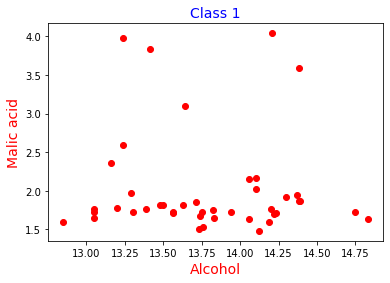

In [158]:
f1=0
f2=1
label=1
plt.plot(trainx[trainy==label, f1], trainx[trainy==label, f2], 'ro')
plt.xlabel(featurenames[f1], fontsize=14, color='red')
plt.ylabel(featurenames[f2], fontsize=14, color='red')
plt.title('Class ' + str(label), fontsize=14, color='blue')

In [201]:
def multi_generative_model(x,y,feature):
    k=3
    d=len(feature)
    mean=np.zeros((k+1,d))
    covariance=np.zeros((k+1,d,d))
    pi=np.zeros(k+1)
    for label in range(1,k+1):
        indices=(y==label)
        mean[label,:], covariance[label,:,:]=get_mu_cvar(x[indices,:],feature)
        pi[label]=float(sum(indices))/float(len(y))
    return mean,covariance,pi

In [202]:
mu,cv, pi = multi_generative_model(trainx,trainy,[0,1])
print('mean\n', mu)
print('covariance\n', cv)
print('Pi\n',pi)


mean
 [[ 0.          0.        ]
 [13.78534884  2.02232558]
 [12.31092593  1.91925926]
 [13.15969697  3.37727273]]
covariance
 [[[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.23325279 -0.01359616]
  [-0.01359616  0.43132948]]

 [[ 0.2819047  -0.03037339]
  [-0.03037339  1.17309945]]

 [[ 0.2851787   0.04382948]
  [ 0.04382948  1.36014105]]]
Pi
 [0.         0.33076923 0.41538462 0.25384615]


In [ ]:
test_model(f1):
    

np.log(pi[i])+multivariate_normal.logpdf(testx[i,j], mean=mu[label,feature])